# 1. Optimization problem

## 1.1. Problem statement
Optimization is the problem of finding minimum or maximum of a function.

## 1.2. First-derivative test

## 1.3. Second-derivative test

# 2. Gradient Descent variants
In real life, especially when the gradient gets very complicated or is very large, mathematical methods on solving for global minimum are shown to be impossible. There are a number of computational methods have been developed in order to find extrema of a function, where [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent) (GD) is one of the most pupular and is widely used in Machine Learning. This is an iterative method trying to minimize a [differentiable](https://en.wikipedia.org/wiki/Differentiable_function) function; in the context of Machine Learning, the function to be minimized is nothing but the loss function, $L(\mathbf{w})$, where $\mathbf{w}$ represents model parameters. The gradient of this function is denoted $\mathbf{g}=g(\mathbf{w})=\nabla L(\mathbf{w})$.

There is a drawback of GD is that it is designed to find a local minimum, while we need the global minimum of the loss function.
Gradient Descent itself is a simple method, and there has been a lot of works proposed to tackle this problem, described in a evolutionary chart as below.

<img src='image/gradient_descent_evolutionary.png' style='height:350px; margin:20px auto 20px;'>

## 2.1. BGD
This section is about the most basic idea of the family, Full-**B**atch **G**radient **D**escent (BGD). Also known as Vanilla GD.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation, PillowWriter
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

### Analysis of derivative
To understand the smart idea behind Gradient Descent, we first analyze the relative position between a random point to its *closest* local minimum. We have already known derivarive at a point is the representation of *instantaneous velocity*, but how about its direction? To illustrate this, let's plot the derivatives at some points of a 1-dimensional function as vectors along the $x$-axis.

$$y=\frac{1}{128}(x^4-8x^3)$$

<img src='output/directional_derivative.png' style='height:300px; margin:0px auto 20px;'>

In this function, there are two [critical points](<https://en.wikipedia.org/wiki/Critical_point_(mathematics)>) at $x=0$ and $x=6$, in which the first one is a [saddle point](https://en.wikipedia.org/wiki/Saddle_point) and the second one is a [local minimum](https://en.wikipedia.org/wiki/Maxima_and_minima). A very important conclusion can be drawn from this graph is that directional derivatives always *point away* from the steepest path downwards. In other words, if we move the point in the *opposite direction* of the derivative, we will end up approach a local minimum or a saddle point. Unfortunately, from the perspective of a single point on the graph and using only gradient, there is no way to regconize if there comes a saddle point.

In [28]:
func = lambda x: 1/128 * (x**4 - 8*x**3)
grad = lambda x: 1/32 * (x**3 - 6*x**2)

left, right = -4, 10
xData = np.linspace(left, right, 1000)
yData = func(xData)

xCritical = np.array([0, 6])
yCritical = func(xCritical)

xRed = np.array([-2])
yRed = func(xRed)
uRed = grad(xRed)
vRed = np.zeros(xRed.shape)

xBlue = np.array([3, 4, 7])
yBlue = func(xBlue)
uBlue = grad(xBlue)
vBlue = np.zeros(xBlue.shape)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(xData, yData, '-', c='grey')
ax.plot(xCritical, yCritical, 'o', c='grey')
ax.plot(xRed, yRed, 'o', c='indianred')
ax.quiver(xRed, yRed, uRed, vRed, color='indianred', units='xy', scale=1/2)
ax.plot(xBlue, yBlue, 'o', c='cornflowerblue')
ax.quiver(xBlue, yBlue, uBlue, vBlue, color='cornflowerblue', units='xy', scale=1/2)
ax.set_xlim(left, right)
fig.savefig('output/directional_derivative.png', dpi=500, bbox_inches='tight')
plt.close(fig)

### Algorithm
From the above analyses, an iterative method call Gradient Descent has been proposed to find local minima. This algorithm initializes an arbitrary point and update its position at each iteration $t$ using the formula:

$$\begin{aligned}
\Delta x_t &= -\eta g_t \\
x_{t+1} &= x_t+\Delta x_t
\end{aligned}$$

Using this design, the (magnitude of) the gradient gets smaller and smaller and finally approach 0, thus the name of the algorithm. The whole process can be thought as a ball rolling down the hill. There is a coefficient named the *learning rate* (denoted $\eta$) attached to the gradient, controls how large each step is. The value of this hyperparameter should not be either too large (making the convergence not happening) or too small (taking too long to converge). The effect of learning rate is illustrated in the following example, in which we build the algorithm from scratch to find the minimum of the function $y=x^2+5\sin(x)$ for different values of $\eta$.

<img src='output/batch_gradient_descent.gif' style='height:250px; margin:20px auto 20px;'>

The updating process can also be summarized as [learning curves](<https://en.wikipedia.org/wiki/Learning_curve_(machine_learning)>). A couple of stopping conditions are also used such as tolerance (maximum magnitude of gradient) or maximum number of iterations. In the example, I use 50 iterations and set the value of tolerance to 0 to make sure all iterations are used.

In [2]:
def BatchGD(func, grad, eta, nIter, xInit, tol=0):
    x = xInit
    y = func(x)
    xList, yList = np.array(x), np.array(y)
    
    for i in range(nIter):
        xDelta = - eta * grad(x)
        x = x + xDelta
        y = func(x)
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

In [3]:
func = lambda x: x**2 + 5*np.sin(x)
grad = lambda x: 2*x + 5*np.cos(x)

nIter = 30
xInit = 5

eta1 = 0.4
eta2 = 0.1
eta3 = 0.06

frames1 = BatchGD(func, grad, eta1, nIter, xInit)
frames2 = BatchGD(func, grad, eta2, nIter, xInit)
frames3 = BatchGD(func, grad, eta3, nIter, xInit)
iList = np.arange(nIter+1)
frames = np.c_[iList, frames1, frames2, frames3]

xLeft, xRight = -3, 5

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,4), sharey=True, sharex=True, constrained_layout=True)
xGraph = np.linspace(xLeft, xRight, 1000)
yGraph = func(xGraph)

def animate(frame):
    i, x1, y1, x2, y2, x3, y3 = frame
    
    ax1.clear()
    ax1.set_xlim(xLeft, xRight)
    ax1.set_ylim(-4, 15)
    ax1.set_title(f'learningRate={eta1}')
    line1, = ax1.plot(xGraph, yGraph, c='grey')
    point1, = ax1.plot(x1, y1, 'o', c='indianred')
    
    ax2.clear()
    ax2.set_title(f'learningRate={eta2}')
    line2, = ax2.plot(xGraph, yGraph, c='grey')
    point2, = ax2.plot(x2, y2, 'o', c='indianred')
    
    ax3.clear()
    ax3.set_title(f'learningRate={eta3}')
    line3, = ax3.plot(xGraph, yGraph, c='grey')
    point3, = ax3.plot(x3, y3, 'o', c='indianred')
    
    fig.suptitle(f'Iteration {i:.0f}/{nIter}', size=14)
    
    return line1, point1, line2, point2, line3, point3

gif = FuncAnimation(fig, animate, frames, interval=200, blit=False, repeat=True)
plt.close(fig)

path = 'output/batch_gradient_descent.gif'
gif.save(path, dpi=300, writer=PillowWriter())

In [14]:
def compare_gd(listAlgo, listLabel):
    fig, ax = plt.subplots()
    for algo, label in zip(listAlgo, listLabel):
        xList, yList = algo.T
        ax.plot(yList, label=label)
    ax.legend()
    ax.set_xlabel('Iteration')
    ax.set_ylabel('FunctionValue')
    ax.set_title('Learning Curves')
    plt.show()

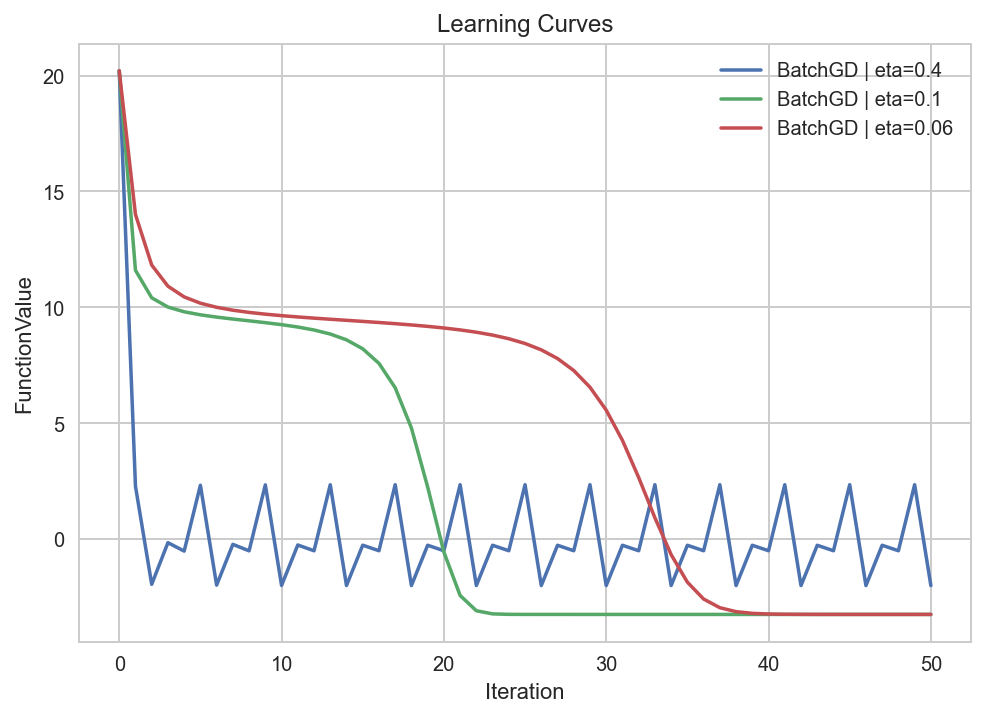

In [77]:
func = lambda x: x**2 + 5*np.sin(x)
grad = lambda x: 2*x + 5*np.cos(x)

eta1 = 0.4
eta2 = 0.1
eta3 = 0.06

listAlgo = [
    BatchGD(func, grad, eta=eta1, nIter=50, xInit=5),
    BatchGD(func, grad, eta=eta2, nIter=50, xInit=5),
    BatchGD(func, grad, eta=eta3, nIter=50, xInit=5),
]

listLabel = [
    f'BatchGD | eta={eta1}',
    f'BatchGD | eta={eta2}',
    f'BatchGD | eta={eta3}',
]

compare_gd(listAlgo, listLabel)

## 2.2. SGD
In this section, we talk about some drawbacks of BGD in practice: (1) its heavy dependence on the intial point, (2) the capability of online learning, (3) the memory cost and how [**S**tochastic **G**radient **D**escent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) (SGD) comes to the rescue.

### Stochastic behaviour
This Gradient Descent's variant only considers a part of data (mini-batch, or batch for short) instead of the whole dataset (full-batch) in each iteration to compute the gradient. The term *stochastic* means we add something *random*, *non-deterministic* into the algorithm. At first glance, a common sense is that using a part of data is less accurate, but it turns out SGD is amazingly efficient in practice. Let's analyze the advantages of SGD over BGD.
- SGD makes data in each iteration small enough so that it can be loaded into RAM with ease, this also reduces the computation cost significantly.
- Randomness in SGD works as a regularization mechanic, some sort of trade-off between exploration and exploitation. In short-term, noisy steps can lead the ball away from local minima or saddle points; while in long-term, the ball still tends to finish in a valley bottom. For BGD, the ball goes straight to the local minimum; this behaviour is deterministic and thus has no exploration.
- SGD enables *online learning*, which is a very important feature when implementing in practice. When there are new data, SGD treats them as a number of batches and updates to the current model easily, without re-computing gradients for the entire dataset.

As steps in SGD are very noisy, we need to update more frequently than BGD to reach *long-term* state. This leads to the idea of using more than one epoch (an epoch is a pass over all data samples), which will be described in the next part. Nowadays, the SGD algorithm using the epoch concept is implemented in many modern ML/DL frameworks. Later improved techniques are also developed based on this implementation; however, I still use BGD to make things as simple as possible.

### Algorithm
*Input*
- A dataset $\mathcal{D}$ having $N$ samples
- A loss function $L(\mathbf{w})$ and its gradient $\nabla{L}$
- A learning rate, $\eta$
- A batch size, $B$
- A number of epochs, $E$

*Step 1*. Calculate the number of batches $T=\lceil N/B\rceil$.

*Step 2*. Initialize model parameters $\mathbf{w}$ randomly.

*Step 3*. For $e=1,2,\dots,E$:
- Shuffle the training set $\mathcal{D}$ to renew batches.
- Divide $\mathcal{D}$ into $T$ batches, denoted $\mathcal{B}_1,\mathcal{B}_2,\dots,\mathcal{B}_T$. Each batch has the size of $B$ and the last batch may have less than $B$ samples.
- For $t=1,2,\dots,T$:
    - Compute the gradient $\nabla{L(\mathbf{w})}$ for batch $\mathcal{B}_t$
    - Compute the step size by multiplying the learning rate and the gradient
    - Update the position using the rule: $\mathbf{w}\leftarrow\mathbf{w}-\eta\,\nabla{L(\mathbf{w})}$

# 3. Optimized methods
For simplification purpose, in this section, the function to be minimized is $y=f(x)$.

## 3.1. Momentum
As far as we know, GD works as a ball rolling down the hill and stops in a valley bottom. However, our ball will stuck in local minima most of the time, then we need some [acceleration](https://en.wikipedia.org/wiki/Acceleration) to helps it cross these traps. A Momentum term has been introduced to extend the GD's update rule as follow:

$$\begin{aligned}
m_t &= \gamma m_{t-1}-\eta g_t \\
\Delta x_t &= m_t \\
x_{t+1} &= x_t+\Delta x_t
\end{aligned}$$

In each step, the ball not only moves downwards as normal GD, but also accumulates [momentum](https://en.wikipedia.org/wiki/Momentum) from all previous steps:

$$m_T=-\eta\sum_{t=1}^{T}{\gamma^t g_{T-t}}$$

The amount of information memorized from the previous step is controled by a coefficient, $\gamma$. The value of this hyperparameter is set $0<\gamma<1$, typically $0.9$, forcing earlier steps to have less effect. Visually, the motion of the ball is now more realistic, as it seems to carry [inertia](https://en.wikipedia.org/wiki/Inertia).

<img src='output/momentum_gradient_descent.gif' style='height:250px; margin:20px auto 20px;'>

The benefits of using Momentum includes:
- Momentum can help escaping local minima and saddle points
- Momentum accelerates the ball so that it moves faster towards the minima
- When implemented in SGD, Momentum dampens the *oscillations*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation, PillowWriter
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [6]:
def BatchGD(func, grad, eta, nIter, xInit, tol=0):
    x = xInit
    y = func(x)
    xList, yList = np.array(x), np.array(y)
    
    for i in range(nIter):
        xDelta = - eta * grad(x)
        x = x + xDelta
        y = func(x)
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

def MomentumGD(func, grad, eta, gamma, nIter, xInit, tol=0):
    x = xInit
    y = func(x)
    xDelta = 0
    xList, yList = np.array(x), np.array(y)
    
    for i in range(nIter):
        xDelta = gamma * xDelta - eta * grad(x)
        x = x + xDelta
        y = func(x)
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

In [1]:
func = lambda x: 1/12 * (3*x**4 - 16*x**3 + 18*x**2)
grad = lambda x: x**3 - 4*x**2 + 3*x

nIter = 50
xInit = -1.5
eta = 0.08
gamma = 0.8

frames1 = BatchGD(func, grad, eta, nIter, xInit)
frames2 = MomentumGD(func, grad, eta, gamma, nIter, xInit)
iList = np.arange(nIter+1)
frames = np.c_[iList, frames1, frames2]

xLeft, xRight = -2, 4

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,4), sharey=True, sharex=True, constrained_layout=True)
xGraph = np.linspace(xLeft, xRight, 1000)
yGraph = func(xGraph)

def animate(frame):
    i, x1, y1, x2, y2 = frame
    
    ax1.clear()
    ax1.set_xlim(xLeft, xRight)
    ax1.set_ylim(-4, 15)
    ax1.set_title(f'learningRate={eta}')
    line1, = ax1.plot(xGraph, yGraph, c='grey')
    point1, = ax1.plot(x1, y1, 'o', c='indianred')
    
    ax2.clear()
    ax2.set_title(f'learningRate={eta}, momentum={gamma}')
    line2, = ax2.plot(xGraph, yGraph, c='grey')
    point2, = ax2.plot(x2, y2, 'o', c='indianred')
    
    fig.suptitle(f'Iteration {i:.0f}/{nIter}', size=14)
    
    return line1, point1, line2, point2

gif = FuncAnimation(fig, animate, frames, interval=200, blit=False, repeat=True)
plt.close(fig)

path = 'output/momentum_gradient_descent.gif'
gif.save(path, dpi=300, writer=PillowWriter())

NameError: name 'BatchGD' is not defined

## 3.2. Nesterov
NAG (**N**esterov **A**ccelerated **G**radient) is the better version of adaptive gradient method. Instead of letting the ball blindly rolls down the hill, NAG makes the ball smarter by pointing out where it need to be, slowing down before the hill slopes up again. The main idea of NAG is it takes a big jump in the direction of previous accumulate gradient, then calculate the gradient at the end up and make the correction. The process continues until convergence

$$\begin{aligned}
g_t &= \nabla f(x_t+\gamma m_{t-1}) \\
m_t &= \gamma m_{t-1}-\eta g_t \\
\Delta x_t &= m_t \\
x_{t+1} &= x_t+\Delta x_t
\end{aligned}$$

By re-assigning $x_t \leftarrow x_t+\gamma\Delta x_{t-1}$, we end up getting equivalent update rules:

$$\begin{aligned}
g_t &= \nabla f(x_t) \\
m_t &= \gamma m_{t-1}-\eta g_t \\
\Delta x_t &= \gamma m_t-\eta g_t \\
x_{t+1} &= x_t+\Delta x_t
\end{aligned}$$

<img src='image/nesterov_gradient.png' style='height:200px; margin:20px auto 20px;'>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation, PillowWriter
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [4]:
def compare_gd(listAlgo, listLabel):
    fig, ax = plt.subplots()
    for algo, label in zip(listAlgo, listLabel):
        xList, yList = algo.T
        ax.plot(yList, label=label)
    ax.legend()
    ax.set_xlabel('Iteration')
    ax.set_ylabel('FunctionValue')
    ax.set_title('Learning Curves')
    plt.show()

In [21]:
def MomentumGD(func, grad, eta, gamma, nIter, xInit, tol=0):
    x = xInit
    y = func(x)
    xDelta = 0
    xList, yList = np.array(x), np.array(y)
    
    for i in range(nIter):
        xDelta = gamma * xDelta - eta * grad(x)
        x = x + xDelta
        y = func(x)
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

def NAG(func, grad, eta, gamma, nIter, xInit, tol=0):
    x = xInit
    y = func(x)
    m = 0
    xList, yList = np.array(x), np.array(y)
    
    for i in range(nIter):
        m = gamma * m - eta * grad(x)
        xDelta = gamma * m - eta * grad(x)
        x = x + xDelta
        y = func(x)
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

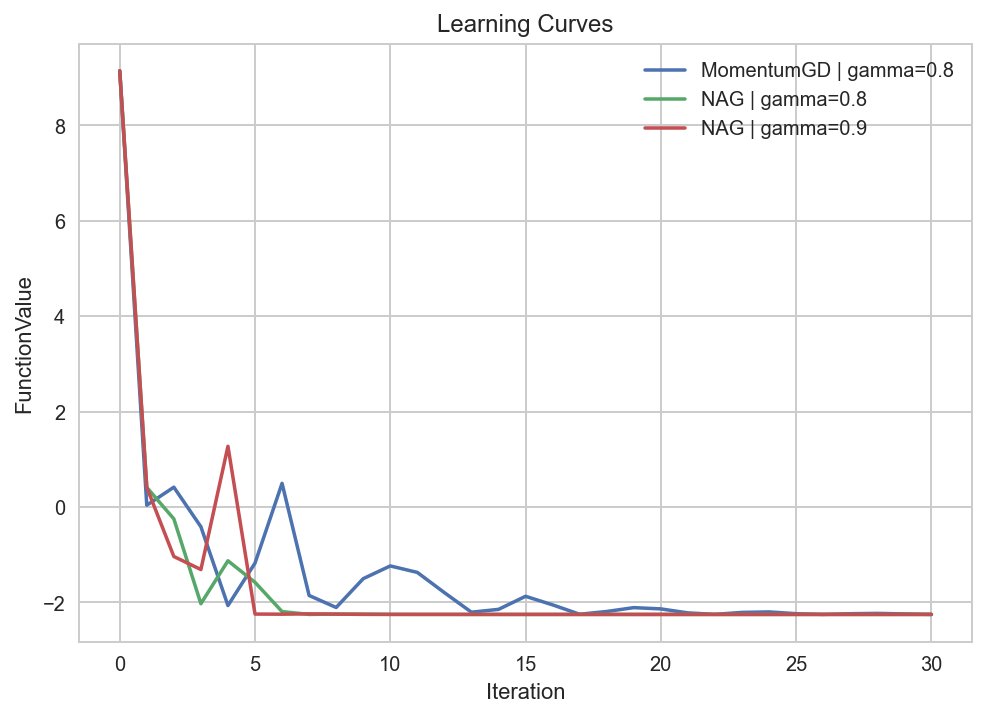

In [26]:
func = lambda x: 1/12 * (3*x**4 - 16*x**3 + 18*x**2)
grad = lambda x: x**3 - 4*x**2 + 3*x

eta = 0.08
gamma1 = 0.8
gamma2 = 0.9

listAlgo = [
    MomentumGD(func, grad, eta, gamma=gamma1, nIter=30, xInit=-1.5),
    NAG(func, grad, eta, gamma=gamma1, nIter=30, xInit=-1.5),
    NAG(func, grad, eta, gamma=gamma2, nIter=30, xInit=-1.5),
]

listLabel = [
    f'MomentumGD | gamma={gamma1}',
    f'NAG | gamma={gamma1}',
    f'NAG | gamma={gamma2}'
]

compare_gd(listAlgo, listLabel)

## 3.3. AdaGrad
AdaGrad (**Ada**ptive **Grad**ients)
The optimizers above remain one learning rate constant through training while AdaGrad adapts learning rate to the parameters, performing low learning rates for parameters associated with dense features, and higher learning rates for parameters associated with sparse features. AdaGrad is suitable for dealing with sparse data, the learning rate will be updated after each iteration.

$$\begin{aligned}
\eta_t &= \frac{\eta}{\sqrt{g_{t}^2+g_{t-1}^2+\dots+\epsilon}} \\
\Delta x_t &= -\eta_t g_t \\
x_{t+1} &= x_t+\Delta x_t
\end{aligned}$$

The current learning rate $\eta_t$ will be affected by accumulate gradients of all previous step so that it will get smaller after each interations and can lead to slow convergence, so the initiation value of learning rate should be high, typically $\eta=0.1$. A smoothing term $\epsilon$ is added to the denominator to prevent divide by zero error.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation, PillowWriter
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [8]:
def BatchGD(func, grad, eta, nIter, xInit, tol=0):
    x = xInit
    y = func(x)
    xList, yList = np.array(x), np.array(y)
    
    for i in range(nIter):
        xDelta = - eta * grad(x)
        x = x + xDelta
        y = func(x)
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

def AdaGrad(func, grad, eta, nIter, xInit, eps=1e-6, tol=0):
    x = xInit
    y = func(x)
    gradInit = grad(x)
    xList, yList, gradList = np.array(x), np.array(y), np.array(gradInit)
    
    for i in range(nIter):
        etaAdj = eta / np.sqrt(np.sum(gradList**2) + eps)
        xDelta = - etaAdj * grad(x)
        x = x + xDelta
        y = func(x)
        gradList = np.append(gradList, grad(x))
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

In [3]:
def compare_gd(listAlgo, listLabel):
    fig, ax = plt.subplots()
    for algo, label in zip(listAlgo, listLabel):
        xList, yList = algo.T
        ax.plot(yList, label=label)
    ax.legend()
    ax.set_xlabel('Iteration')
    ax.set_ylabel('FunctionValue')
    ax.set_title('Learning Curves')
    plt.show()

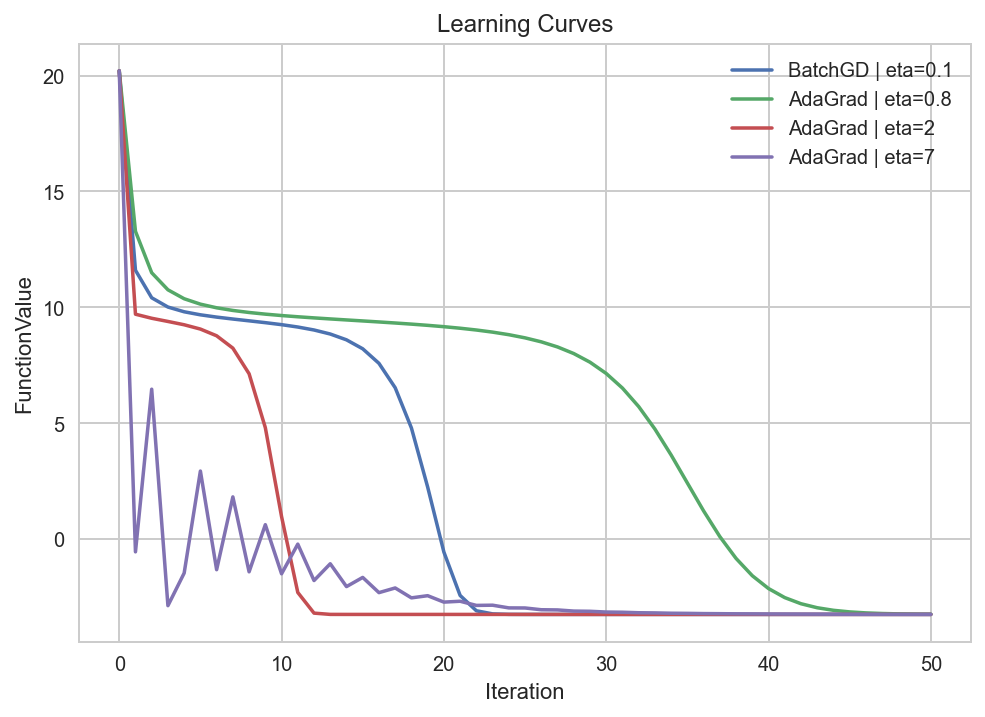

In [75]:
func = lambda x: x**2 + 5*np.sin(x)
grad = lambda x: 2*x + 5*np.cos(x)

eta1 = 0.1
eta2 = 0.8
eta3 = 2
eta4 = 7

listAlgo = [
    BatchGD(func, grad, eta=eta1, nIter=50, xInit=5),
    AdaGrad(func, grad, eta=eta2, nIter=50, xInit=5),
    AdaGrad(func, grad, eta=eta3, nIter=50, xInit=5),
    AdaGrad(func, grad, eta=eta4, nIter=50, xInit=5),
]

listLabel = [
    f'BatchGD | eta={eta1}',
    f'AdaGrad | eta={eta2}',
    f'AdaGrad | eta={eta3}',
    f'AdaGrad | eta={eta4}',
]

compare_gd(listAlgo, listLabel)

## 3.4. RMSprop
RMSprop (**R**oot **M**ean **S**quared **Prop**agation) has been developed in attemp to resolve AdaGrad's radically diminishing learning rates. It defines $v_t$, an [exponentially moving average](https://en.wikipedia.org/wiki/Exponential_smoothing) which is calculated using $v_{t-1}$ and the last squared gradient $g_t^2$.

$$\begin{aligned}
v_t &= \rho v_{t-1}+(1-\rho)g_t^2 \\
\eta_t &= \frac{\eta}{\sqrt{v_t+\epsilon}} \\
\Delta x_t &= -\eta_t g_t \\
x_{t+1} &= x_t+\Delta x_t
\end{aligned}$$

The part $\sqrt{v_t+\epsilon}$ is called *root mean squared*, thus the name of the algorithm. As above formula for $v_t$ is only optimal for programming, we rewrite its formula to have a better understanding of how $v_t$ works.

$$v_T=(1-\rho)\sum_{t=1}^{T}{\rho^t g_{T-t}^2}$$

It's easy to see that the further a gradient $g_t$ is from the current step ($T$), the lower multiplier attached to it. For this reason, we actually accumulate past gradients over a restricted time window, in which gradients significantly contribute to $v_t$. The number of effective gradients is approximately $(1-\rho)^{-1}$, thus $\rho$ is usually choosen between $0.9$ and $0.98$. For example, $\rho=0.9$ implies that only last 10 $g_t$ are effective. Being an extension of AdaGrad, RMSprop also requires $\eta$ to be high enough, usually in the interval $(0.1,0.5)$.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation, PillowWriter
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [7]:
def AdaGrad(func, grad, eta, nIter, xInit, eps=1e-6, tol=0):
    x = xInit
    y = func(x)
    gradInit = grad(x)
    xList, yList, gradList = np.array(x), np.array(y), np.array(gradInit)
    
    for i in range(nIter):
        etaAdj = eta / np.sqrt(np.sum(gradList**2) + eps)
        xDelta = - etaAdj * grad(x)
        x = x + xDelta
        y = func(x)
        gradList = np.append(gradList, grad(x))
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

def RMSprop(func, grad, eta, gamma, nIter, xInit, eps=1e-6, tol=0):
    x = xInit
    y = func(x)
    v = 0
    xList, yList = np.array(x), np.array(y)
    
    for i in range(nIter):
        v = gamma * v + (1-gamma) * grad(x)**2
        etaAdj = eta / np.sqrt(v + eps)
        xDelta = - etaAdj * grad(x)
        x = x + xDelta
        y = func(x)
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

In [2]:
def compare_gd(listAlgo, listLabel):
    fig, ax = plt.subplots()
    for algo, label in zip(listAlgo, listLabel):
        xList, yList = algo.T
        ax.plot(yList, label=label)
    ax.legend()
    ax.set_xlabel('Iteration')
    ax.set_ylabel('FunctionValue')
    ax.set_title('Learning Curves')
    plt.show()

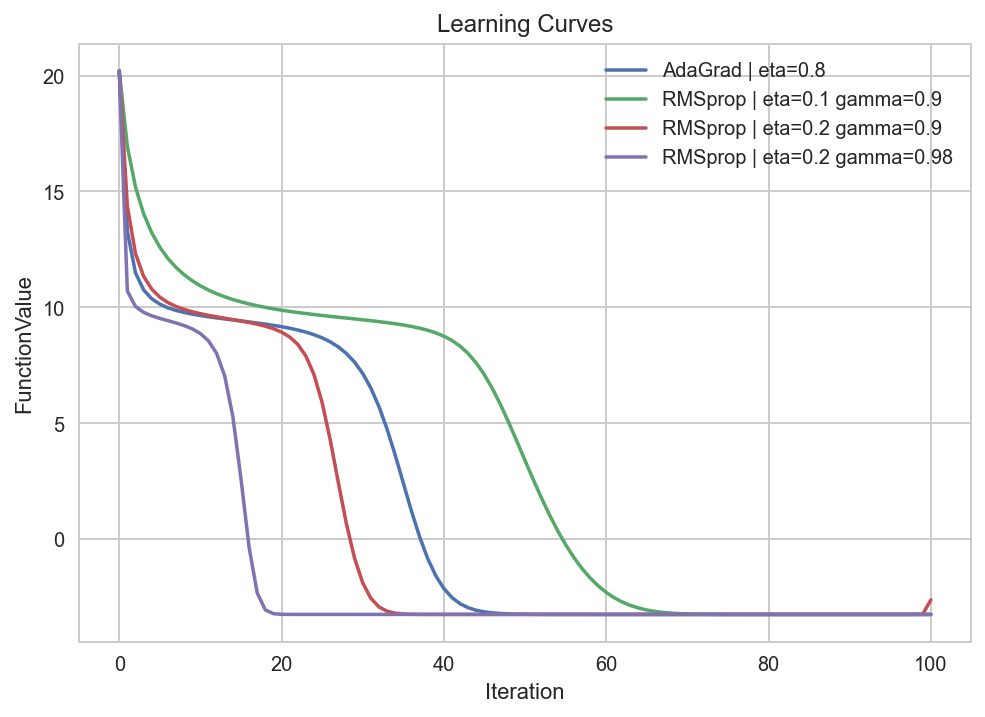

In [8]:
func = lambda x: x**2 + 5*np.sin(x)
grad = lambda x: 2*x + 5*np.cos(x)

eta1 = 0.8
eta2, gamma2 = 0.1, 0.9
eta3, gamma3 = 0.2, 0.9
eta4, gamma4 = 0.2, 0.98

listAlgo = [
    AdaGrad(func, grad, eta=eta1, nIter=100, xInit=5),
    RMSprop(func, grad, eta=eta2, gamma=gamma2, nIter=100, xInit=5),
    RMSprop(func, grad, eta=eta3, gamma=gamma3, nIter=100, xInit=5),
    RMSprop(func, grad, eta=eta4, gamma=gamma4, nIter=100, xInit=5),
]

listLabel = [
    f'AdaGrad | eta={eta1}',
    f'RMSprop | eta={eta2} gamma={gamma2}',
    f'RMSprop | eta={eta3} gamma={gamma3}',
    f'RMSprop | eta={eta4} gamma={gamma4}',
]

compare_gd(listAlgo, listLabel)

## 3.5. AdaDelta
AdaDelta (**Ada**ptive **Delta** $\Delta x$) has both been developed in around the same time, but independently with RMSprop. Its main idea is very much like RMSprop, with an additional variable $u_t$, the exponential smoothing of $\Delta^2 x_t$. Both $u_t$ and $v_t$ share the same smoothing parameter, $\rho$. The update rules of AdaDelta is given below:

$$\begin{aligned}
v_t &= \rho v_{t-1}+(1-\rho)g_t^2 \\
u_t &= \rho u_{t-1}+(1-\rho)\Delta^2 x_t \\
\eta_t &= \sqrt\frac{u_t+\epsilon}{v_t+\epsilon} \\
\Delta x_t &= -\eta_t g_t \\
x_{t+1} &= x_t+\Delta x_t
\end{aligned}$$

The interesting part of AdaDelta is the absence of $\eta$. The update rules make sense because $\sqrt{u_t+\epsilon}$ and $\sqrt{v_t+\epsilon}$ have the same unit with $x_t$ and $g_t$, respectively. But keep in mind that large values of $\rho$ will make the convergence slow.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation, PillowWriter
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [4]:
def compare_gd(listAlgo, listLabel):
    fig, ax = plt.subplots()
    for algo, label in zip(listAlgo, listLabel):
        xList, yList = algo.T
        ax.plot(yList, label=label)
    ax.legend()
    ax.set_xlabel('Iteration')
    ax.set_ylabel('FunctionValue')
    ax.set_title('Learning Curves')
    plt.show()

In [11]:
def AdaDelta(func, grad, gamma, nIter, xInit, tol=0, eps=1e-6):
    x = xInit
    y = func(x)
    xDelta = 0
    u = 0
    v = 0
    xList, yList = np.array(x), np.array(y)
    
    for i in range(nIter):
        u = gamma*u + (1-gamma)*xDelta**2
        v = gamma*v + (1-gamma)*grad(x)**2
        eta = np.sqrt(u+eps) / np.sqrt(v+eps)
        xDelta = -eta * grad(x)
        x += xDelta
        y = func(x)
        
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

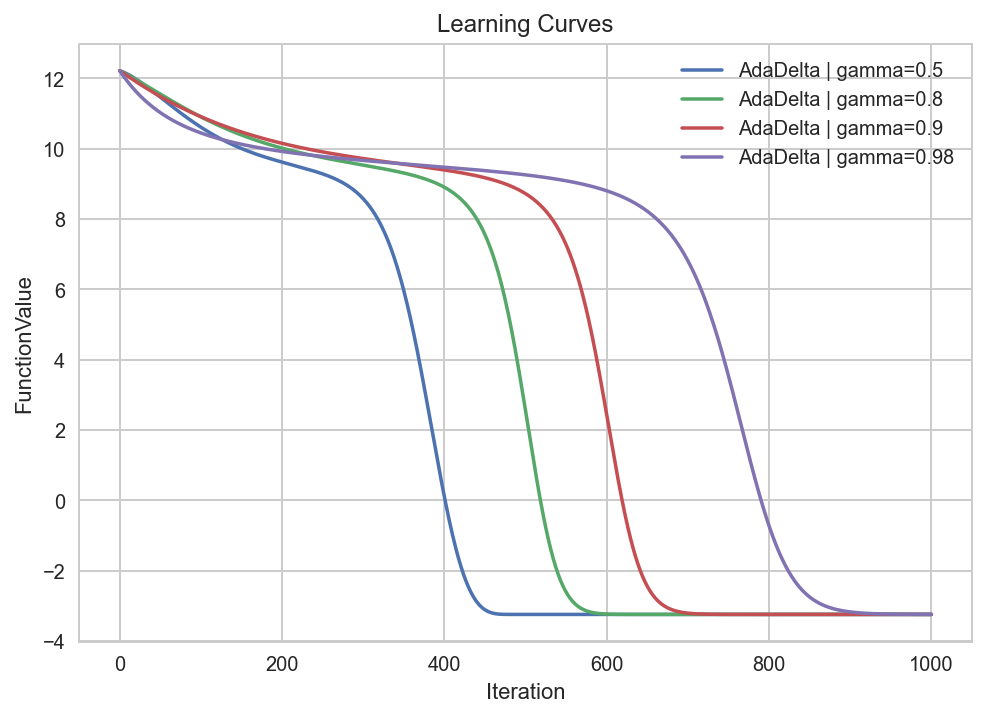

In [12]:
func = lambda x: x**2 + 5*np.sin(x)
grad = lambda x: 2*x + 5*np.cos(x)

xInit = 4
nIter = 1000

gamma1 = 0.5
gamma2 = 0.8
gamma3 = 0.9
gamma4 = 0.98

listAlgo = [
    AdaDelta(func, grad, gamma1, nIter, xInit),
    AdaDelta(func, grad, gamma2, nIter, xInit),
    AdaDelta(func, grad, gamma3, nIter, xInit),
    AdaDelta(func, grad, gamma4, nIter, xInit),
]

listLabel = [
    f'AdaDelta | gamma={gamma1}',
    f'AdaDelta | gamma={gamma2}',
    f'AdaDelta | gamma={gamma3}',
    f'AdaDelta | gamma={gamma4}',
]

compare_gd(listAlgo, listLabel)

## 3.6. Adam
Adam (**Ada**ptive **M**omentum) is the combination of Momentum and RMSprop. It inherits $m_t$, the exponential smoothing of *gradient* from Momentum and $v_t$, the exponential smoothing of *squared gradient* from RMSprop. According to the author of Adam, the inititialize value of $m_t$ and $v_t$ are 0 so they are biased towards 0, especially with a large smoothing factor. Adam fixes these biases by computing the corrected version of exponential smoothing, $\hat{m}_t$ and $\hat{v}_t$.

$$\begin{aligned}
m_t &= \gamma m_{t-1} + (1-\gamma)g_t \\
v_t &= \rho v_{t-1} + (1-\rho)g_t^2 \\
\hat{m}_t,\hat{v}_t &= \frac{m_t}{1-\gamma^t},\frac{v_t}{1-\rho^t} \\
\Delta x_t &= -\frac{\eta}{\sqrt{\hat{v}_t}+\epsilon} \hat{m}_t \\
x_{t+1} &= x_t+\Delta x_t
\end{aligned}$$

The original paper of Adam denotes $\beta_1$ and $\beta_2$ for smoothing coefficients. However, I keep the notations $\gamma$ and $\rho$ from Momentum and RMSprop to make things consistent. The default values suggested by the author are $\gamma=0.9$ and $\rho=0.999$. Because $\eta$ is a constant, a higher value will lead to faster convergence. Adam has the advantages of both Momentum and RMSprop: it can work well with sparse data, has a low learning time and can work well in online and non-stationary settings.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation, PillowWriter
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [4]:
def compare_gd(listAlgo, listLabel):
    fig, ax = plt.subplots()
    for algo, label in zip(listAlgo, listLabel):
        xList, yList = algo.T
        ax.plot(yList, label=label)
    ax.legend()
    ax.set_xlabel('Iteration')
    ax.set_ylabel('FunctionValue')
    ax.set_title('Learning Curves')
    plt.show()

In [27]:
def MomentumGD(func, grad, eta, gamma, nIter, xInit, tol=0):
    x = xInit
    y = func(x)
    xDelta = 0
    xList, yList = np.array(x), np.array(y)
    
    for i in range(nIter):
        xDelta = gamma * xDelta - eta * grad(x)
        x = x + xDelta
        y = func(x)
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

def AdaGrad(func, grad, eta, nIter, xInit, eps=1e-6, tol=0):
    x = xInit
    y = func(x)
    gradInit = grad(x)
    xList, yList, gradList = np.array(x), np.array(y), np.array(gradInit)
    
    for i in range(nIter):
        etaAdj = eta / np.sqrt(np.sum(gradList**2) + eps)
        xDelta = - etaAdj * grad(x)
        x = x + xDelta
        y = func(x)
        gradList = np.append(gradList, grad(x))
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

In [38]:
def Adam(func, grad, eta, eps, beta1, beta2, nIter, xInit, tol=0):
    x = xInit
    y = func(x)
    m = 0
    v = 0
    xList, yList = np.array(x), np.array(y)
    
    for i in range(1,nIter):
        m = beta1 * m + (1-beta1)*grad(x)
        v = beta2 * v + (1-beta2)*grad(x)**2
        m_hat = m/(1-beta1**i)
        v_hat = v/(1-beta2**i)
        xDelta = -eta * m_hat/ (np.sqrt(v_hat) + eps)
        x = x + xDelta
        y = func(x)
        xList = np.append(xList, x)
        yList = np.append(yList, y)
        if np.abs(grad(x)) < tol: break
    
    return np.c_[xList, yList]

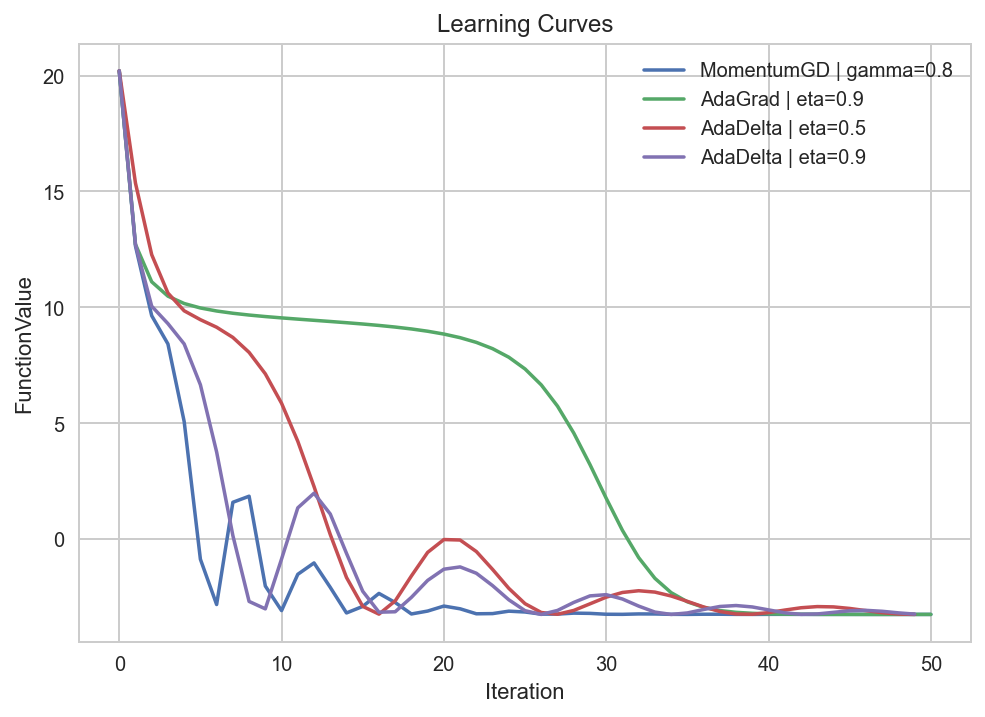

In [42]:
func = lambda x: x**2 + 5*np.sin(x)
grad = lambda x: 2*x + 5*np.cos(x)

nIter = 50
xInit = 5

eta1 = .5
eta2 = .9
eps = 1e-8
beta1 = .9
beta2 = .999

listAlgo = [
    MomentumGD(func, grad, eta=0.08, gamma=0.8, nIter=50, xInit=5, tol=0),
    AdaGrad(func, grad, eta=0.9, nIter=50, xInit=5, eps=1e-6, tol=0),
    Adam(func, grad, eta=eta1, eps=1e-8, beta1=0.9, beta2=0.99, nIter=50, xInit=5, tol=0),
    Adam(func, grad, eta=eta2, eps=1e-8, beta1=0.9, beta2=0.99, nIter=50, xInit=5, tol=0)
]

listLabel = [
    f'MomentumGD | gamma=0.8',
    f'AdaGrad | eta=0.9',
    f'AdaDelta | eta={eta1}',
    f'AdaDelta | eta={eta2}',
]

compare_gd(listAlgo, listLabel)

## 3.7. AdaMax

While Adam just update $v_t$ using current gradient $g_t$ and past gradient $v_{t-1}$, it scales the gradient inversely proportionally with $L_2$ norm, AdaMax can generalize this update to the $L_p$ norm. But with large value of $p$, norms become unstable, however $L_\infty$ also generally exhibits stable behavior:
$\rho^\infty v_{t-1} + (1-\rho^\infty)|g_t|^\infty=\max(\rho v_{t-1},|g_t|)$

$$\begin{aligned}
m_t &= \gamma m_{t-1} + (1-\gamma)g_t \\
v_t &= \max(\rho v_{t-1},|g_t|) \\
\hat{m}_t &= \frac{m_t}{1-\gamma^t} \\
\Delta x_t &= -\frac{\eta}{v_t} \hat{m}_t \\
x_{t+1} &= x_t+\Delta x_t
\end{aligned}$$

AdaMax is sometime performs better Adam, specially in embeddings problems

## 3.8. Nadam
Nadam (**N**esterov accelerated **Adam**) is a combination of NAG and Adam. NAG performs more accurately than standard momentum because it allows to perform a more accurate step in the gradient direction by updating the parameters with the momentum step before computing the gradient.

$$\begin{aligned}
m_t &= \gamma m_{t-1} + (1-\gamma)g_t \\
v_t &= \rho v_{t-1} + (1-\rho)g_t^2 \\
\hat{m}_t,\hat{v}_t &= \frac{m_t}{1-\gamma^t},\frac{v_t}{1-\rho^t} \\
\Delta x_t &= -\frac{\eta}{\sqrt{\hat{v}_t}+\epsilon}(\gamma\hat{m}_t+\frac{1-\gamma}{1-\gamma^t}g_t) \\
x_{t+1} &= x_t+\Delta x_t
\end{aligned}$$

## 3.9. AMSGrad

AMSGrad is a variant of Adam which revisits the adaptive learning rate component in Adam and changes it to ensure that the current $v$ is always larger than the $v$ from the previous time step. In Adam, it has been observed that some minibatches provide large and informative gradients, but as these minibatches only occur rarely, exponential averaging diminishes their influence, which leads to poor convergence. By selecting max $v$, AMSGrad results in a non-increasing step size, which avoids the problems suffered by Adam.
$$\begin{aligned}
m_t &= \gamma m_{t-1} + (1-\gamma)g_t \\
v_t &= \rho v_{t-1} + (1-\rho)g_t^2 \\
\hat{v}_t &= \max(\hat{v}_{t-1},v_t) \\
\Delta x_t &= -\frac{\eta}{\sqrt{\hat{v}_t}+\epsilon} \hat{m}_t \\
x_{t+1} &= x_t+\Delta x_t
\end{aligned}$$

# References
- [Paper] [An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/index.html)
- [Paper] [Nesterov’s Accelerated Gradient and Momentum as approximations to Regularised Update Descent](https://arxiv.org/pdf/1607.01981.pdf)
- [Paper] [Adaptive Subgradient Methods for Online Learning and Stochastic Optimization](https://web.stanford.edu/~jduchi/projects/DuchiHaSi10_colt.pdf)
- [Paper] [AdaDelta: An Adaptive Learning Rate Method](https://arxiv.org/pdf/1212.5701.pdf)
- [Paper] [Adam: A method for Stochastic Optimization](https://arxiv.org/pdf/1412.6980.pdf)
- [Paper] [Incoporating Nesterov Momentum into Adam](https://cs229.stanford.edu/proj2015/054_report.pdf)
- [Paper] [On the Convergence of Adam and Beyond](https://openreview.net/pdf?id=ryQu7f-RZ)
- [Blog] [Optimization algorithms](http://d2l.ai/chapter_optimization/index.html)
- [Blog] [Why Momentum really works](https://distill.pub/2017/momentum/)
- [Blog] [Optimization and Gradient Methods](https://compphysics.github.io/MachineLearningMSU/doc/pub/GradientOptim/html/._GradientOptim-bs000.html)
- [Blog] [Stochastic Gradient Descent with momentum](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d)
- [Blog] [Intro to optimization in deep learning: Momentum, RMSProp and Adam](https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/)

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*